In [1]:
import pandas as pd
titan=pd.read_csv('./titanic.txt')

In [2]:
titan.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [3]:
# 处理数据
x=titan[['pclass','age','sex']]
y=titan['survived']

x['age'].fillna(x['age'].mean(),inplace=True)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# 特性工程——》类别 one_hot编码
from sklearn.feature_extraction import DictVectorizer

dict=DictVectorizer(sparse=False)

x_train=dict.fit_transform(x_train.to_dict(orient='records'))

x_test=dict.transform(x_test.to_dict(orient='records'))


D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [4]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=5)

dtc.fit(x_train,y_train)
print('准确率:',dtc.score(x_test,y_test))

准确率: 0.8237082066869301


C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files\Intel\WiFi\bin\;C:\Program Files\Common Files\Intel\WirelessCommon\;D:\ProgramFiles\Anaconda3\Scripts;D:\ProgramFiles\Anaconda3;D:\ProgramFiles\Anaconda3\Library\mingw-w64\bin;D:\ProgramFiles\Anaconda3\Library\usr\bin;D:\ProgramFiles\Anaconda3\Library\bin;D:\ProgramFiles\Anaconda3\Scripts;D:\ProgramFiles\Anaconda3\bin;C:\Users\liuke\AppData\Local\Android\Sdk\platform-tools;D:\ProgramFiles\mysql-8.0.13-winx64\mysql-8.0.13-winx64\bin;D:\ProgramFiles\Git\cmd;D:\ProgramFiles\nodejs\;C:\Users\liuke\AppData\Local\Microsoft\WindowsApps;D:\ProgramFiles\nodejs\node_global;;C:/Program Files (x86)/Graphviz2.38/bin


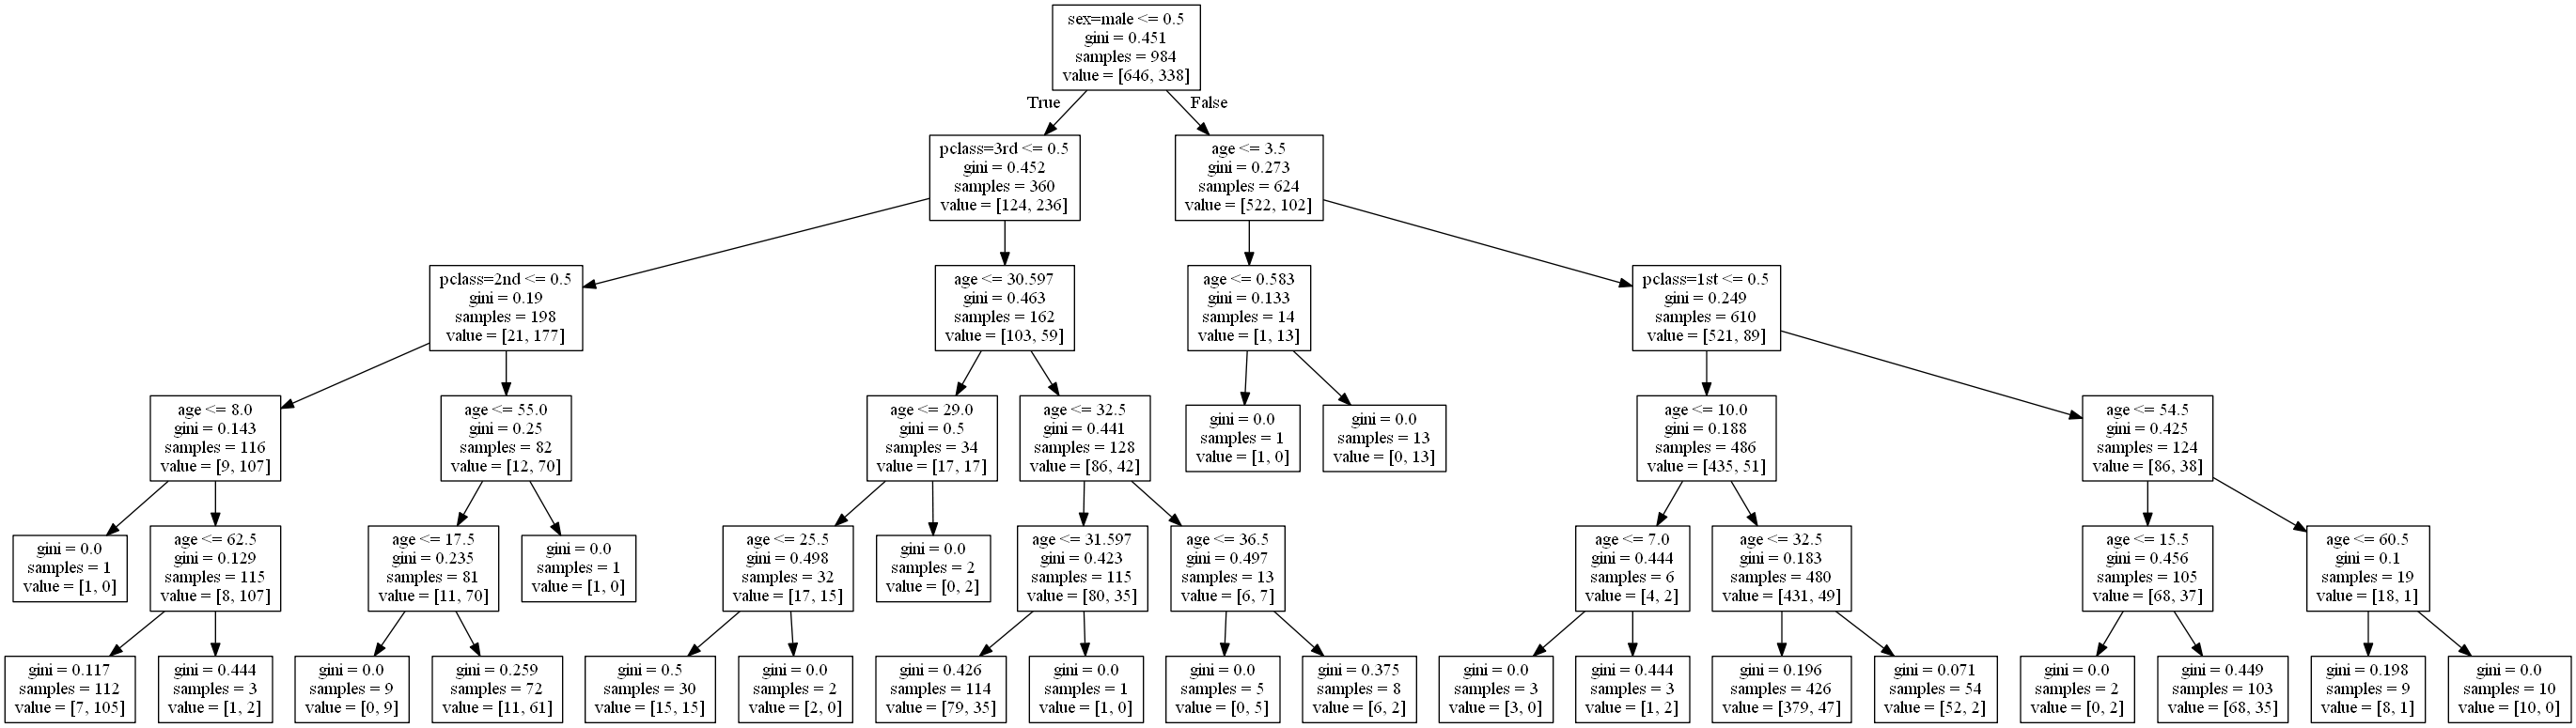

In [5]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
## 添加graphviz的环境变量
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

dot_data = export_graphviz(dtc, out_file=None, 
                         feature_names=dict.get_feature_names())  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [6]:
print(dict.get_feature_names())

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

rf=RandomForestClassifier()
# 网格搜索与交叉验证
param={'n_estimators':[120,200,300,500,800,1200],'max_depth':[5,8,15,25,30]}
gc=GridSearchCV(rf,param_grid=param,cv=2)

gc.fit(x_train,y_train)

print("准确率：",gc.score(x_test,y_test))

print("查看选择的参数模型：",gc.best_params_)

准确率： 0.8267477203647416
查看选择的参数模型： {'max_depth': 5, 'n_estimators': 120}
